In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog

In [2]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

In [ ]:
test = cv2.imread('test.png')
outputs = predictor(test)

/home/prakyath/github/personal/.personal/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


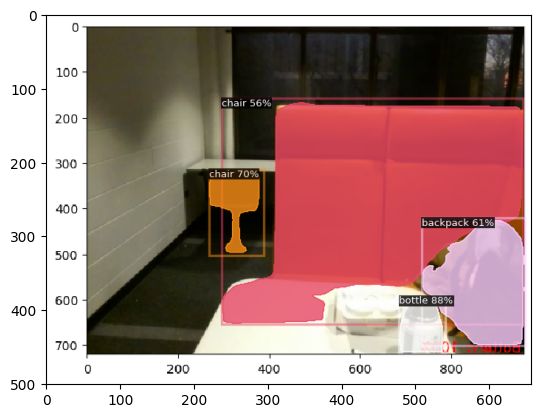

In [23]:

v = Visualizer(test[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image())

In [27]:
v = Visualizer(test[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2, instance_mode=ColorMode.SEGMENTATION)
x = outputs["pred_masks"].argmax(dim=0)
out = v.draw_sem_seg(x.to("cpu"))
plt.imshow(out.get_image())

KeyError: 'pred_masks'

In [52]:
np.sum(outputs['instances'].pred_masks.cpu().numpy(), axis  = )

TypeError: 'list' object cannot be interpreted as an integer

In [35]:
outputs['instances'].pred_masks.cpu().numpy().shape

(4, 418, 548)

In [47]:
from matplotlib.image import imread
import scipy.misc
from PIL import Image  

def cropper(org_image, mask_array):
    img = org_image
    mask_array = np.moveaxis(mask_array, 0, -1)
    mask_array_instance = []
    output = np.zeros_like(img)
    num_instances = mask_array.shape[0]
    for i in range(num_instances):
        mask_array_instance.append(mask_array[:, :, i:(i+1)])
        output = np.where(mask_array_instance[i] == True, 255, output)
    print(Image.fromarray(output))

In [3]:
# load the images
image = cv2.imread('test.png')
from predictor import VisualizationDemo

In [4]:
predictor = VisualizationDemo(cfg)

In [25]:
predictor_result, images = predictor.run_on_image(image)

In [10]:
# panoptic_seg, segments_info = predictor_result["sem_seg"].argmax(dim=0).to(self.cpu_device)

In [16]:
predictor_result['instances'].get_fields()['scores'].cpu().numpy()

array([0.8811663 , 0.7020902 , 0.60660285, 0.5572009 ], dtype=float32)

In [23]:
np.sum(np.sum(predictor_result['instances'].get_fields()['pred_masks'].cpu().numpy(), axis = 1),axis= 1)

array([ 2672,  2971, 11693, 55060])

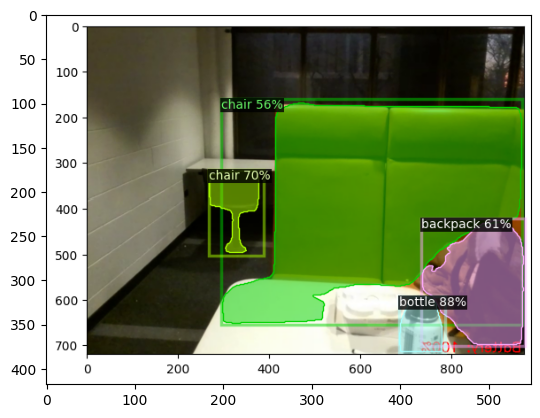

In [26]:
plt.imshow(images.get_image())